In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Importing the dataset
weather_data = pd.read_csv('C:\\Users\\rahul\\OneDrive\\Desktop\\DS\\Ivy\\Python\\Data and code\\Data\\weatherHistory.csv')
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
# General info about the dataset
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
# Total missing values in the dataset
weather_data.isnull().sum() # 517 missing values in Precip Type

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

By seeing at the info and missing values in the dataset - 

1. Formatted Date is of no use as it has no relation with the temperature and mostly affects a time series data

2. Precip Type has 517 missing values, so we need to replace these missing values with the mode of data as total percentage of missing value is very less (< 0.55%)

3. Summary and Daily Summary has too many categories (impossible to create dummy variables) and hence are of no use

4. Loud Cover has only one type of value (zeros only), so it will not contribute anything to the model

Hence we will eliminate these variables and treat the missing values in Precip Type


In [5]:
# Eliminating garbage variables
weather_data = weather_data.drop(columns = ["Formatted Date","Summary","Daily Summary","Loud Cover"])

# Treating missing values in Precip Type
weather_data["Precip Type"].fillna(weather_data["Precip Type"].value_counts(). idxmax(), inplace = True)

In [6]:
# Statistical description of all continuous variables 
weather_data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [7]:
# Statistical description of all categorical variables 
weather_data.describe(include='O')

,Precip Type
count,96453
unique,2
top,rain
freq,85741


As ML models cannot understand character variables so we will do feature engineering by converting rain as 1 and snow as 0 in Precip type variable

In [8]:
# Total categories in Precip Type variable
weather_data['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [9]:
# Feature engineering
weather_data["Precip Type"].replace({'snow':0, 'rain':1}, inplace = True)

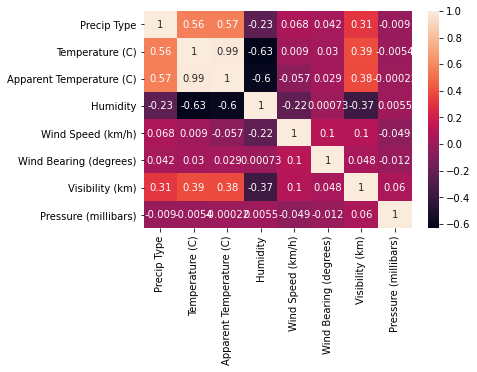

In [10]:
# Correlation matrix for all the continuous variables in the dataset
corrMatrix = weather_data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

By seeing at the correlation matrix it can be said that variables like - 

1. Wind Speed (km/h)
2. Wind Bearing (degrees)
3. Pressure (millibars)
4. Visibility (km)

are very weakly correlated with the dependent variable (Temperature (C)), so we will eliminate them

In [11]:
# Eliminating weakly correlated variables variables
weather_data = weather_data.drop(columns = ["Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)", "Visibility (km)"])

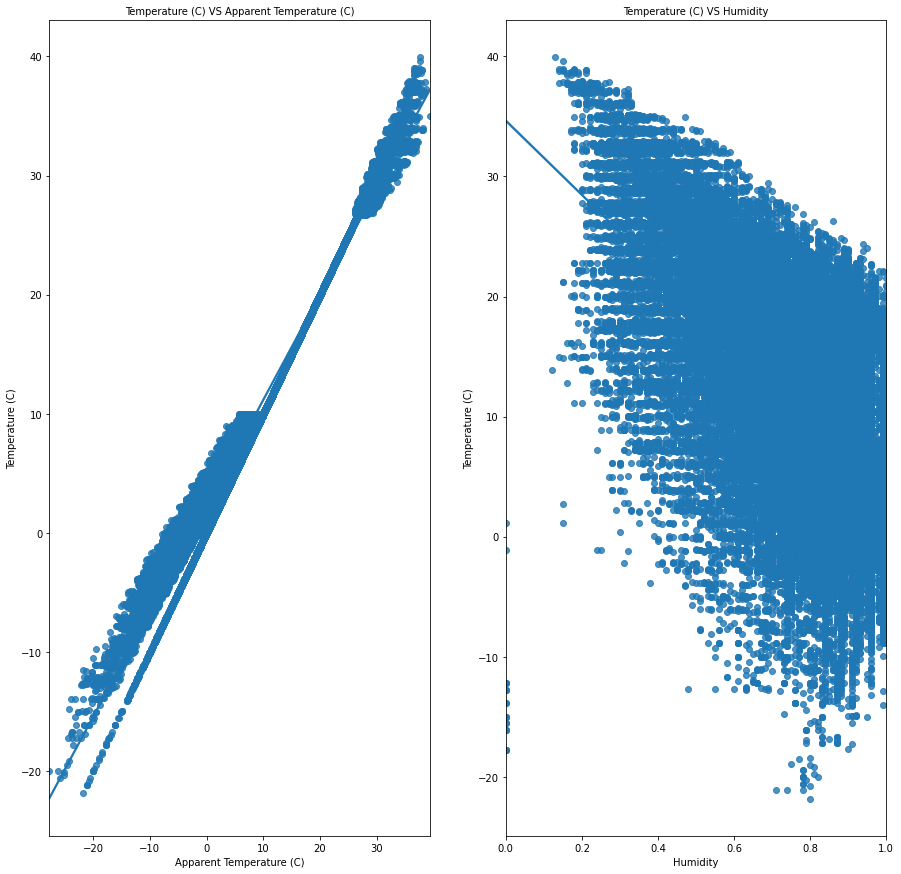

In [12]:
# Code for creating scatter plot for continuous variables 
plt.figure(figsize = (15,15))
cols = weather_data.columns
for r in range(1,len(cols)-1):
  plt.subplot(1,2,r)
  sns.regplot( x = cols[r+1], y = 'Temperature (C)', data=weather_data, fit_reg=True)
  plt.title("Temperature (C) VS " + cols[r+1], fontsize = 10)

Scatter plot also suggests that there is a correlation between 
Temperature (C) and- 

1. Apparent Temperature (C)- strong co-relation
2. Humidity - strong co-relation

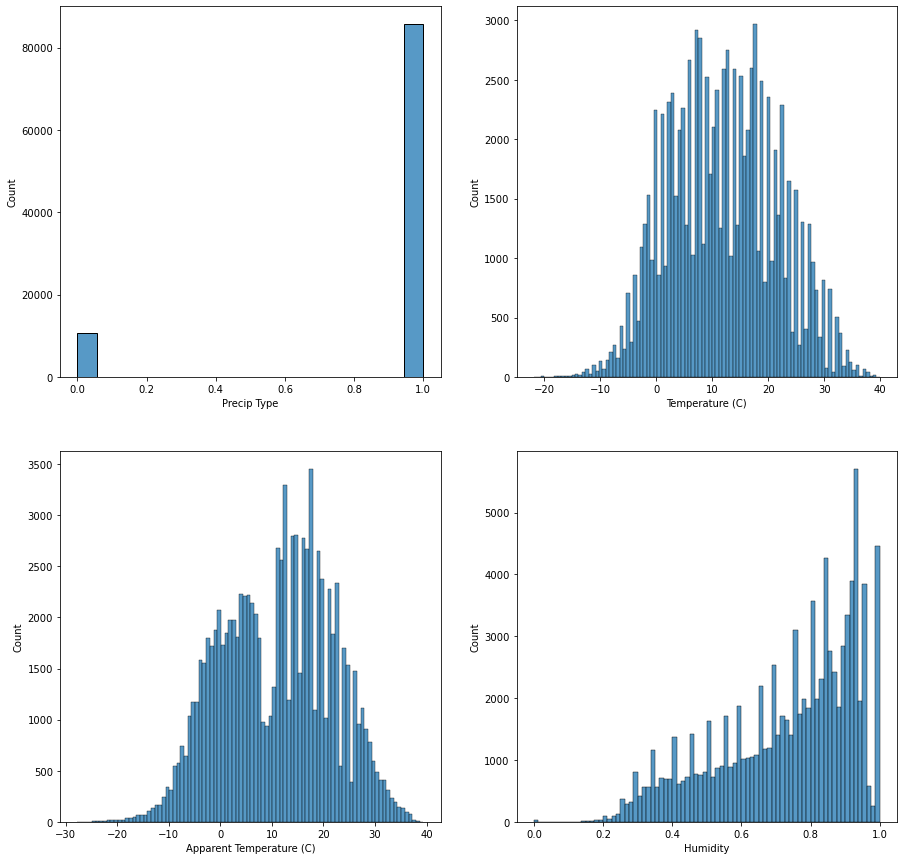

In [13]:
# Code to create distribution curve for all variables
plt.figure(figsize = (15,15))
cols = weather_data.columns
for r in range(1,len(cols)+1):
  plt.subplot(2,2,r)
  sns.histplot(weather_data[cols[r-1]])

Here we can see that Temperature (C) and Apparent Temperature (C) both are showing perfectly normal distribution (means no outliers) however, it is not true with Humidity. So, we will detect and remove and remove outliers from Humidity

In [14]:
# Function to return outliers
def detect_outlier(data_1):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [15]:
# Outliers in Humidity column
outlier_data = detect_outlier(weather_data["Humidity"])
print (outlier_data)

[0.14, 0.14, 0.14, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.14]


In [16]:
# Removing the Outliers
weather_data = weather_data[weather_data["Humidity"]>0.15]

In [17]:
# Extracting the variable to be predicted
train_y = weather_data['Temperature (C)']

In [18]:
# Extracting input features 
train_x = weather_data.drop(columns = ["Temperature (C)"])

In [19]:
# Splitting the data into training and test data
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15, random_state=42, )
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((81952, 3), (14463, 3), (81952,), (14463,))

81952 data points in training set, 14463 data points in test set, 3 independent variables and a dependent variable

In [20]:
# Fitting Multiple Linear Regression to the Training set
model_sklearn = LinearRegression()
model_sklearn.fit(train_x, train_y)
predict_train_model_sklearn = model_sklearn.predict(train_x)
train_MSE_model_sklearn = mean_squared_error(train_y, predict_train_model_sklearn)
train_r2score_model_sklearn = r2_score(train_y, predict_train_model_sklearn)
print("MSE after training the data by sklearn linear model:",train_MSE_model_sklearn)
print("r2 score after training the data by sklearn linear model : ",train_r2score_model_sklearn)
print("Coefficients by sklearn linear model : ",model_sklearn.coef_)
print("Intercept by sklearn linear model : ",model_sklearn.intercept_)

MSE after training the data by sklearn linear model: 1.1582172027912538
r2 score after training the data by sklearn linear model :  0.9872391133262627
Coefficients by sklearn linear model :  [ 0.36577661  0.84993109 -2.73825109]
Intercept by sklearn linear model :  4.392430208305906


In [21]:
# prediction on test data 
predict_test_model_sklearn = model_sklearn.predict(test_x)
test_MSE_model_sklearn = mean_squared_error(test_y, predict_test_model_sklearn)
test_r2score_model_sklearn = r2_score(test_y, predict_test_model_sklearn)
print("MSE after test on sklearn model :",test_MSE_model_sklearn )
print("r2 score after on sklearn model : ",test_r2score_model_sklearn)

MSE after test on sklearn model : 1.1744594447520527
r2 score after on sklearn model :  0.987319863212834


1. r2 score value in both training set and test set is close to 99%, means model has trained perfectly and there is no overfitting

2. According to the analysis and model trained (sklearn model),factors which have an impact on the Temperature in Hungary are-

   1. Apparent Temperature (C)- +ve coefficient
   2. Humidity - -ve coefficient
   3. Precip Type - +ve coefficent

+ve coefficent means directly proportional and -ve correlation means inversely proportional   

In [22]:
# Fitting stats linear regression model
# Adding intercept term to the data
train_stats_x = sm.add_constant(train_x)
test_stats_x = sm.add_constant(test_x)
# training the model and printing the model statistics
model_stats = sm.OLS(train_y,train_stats_x).fit()
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 2.113e+06
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:01:16   Log-Likelihood:            -1.2230e+05
No. Observations:               81952   AIC:                         2.446e+05
Df Residuals:                   81948   BIC:                         2.447e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.3924      0.023    194.863      0.000       4.348       4.437
Precip Type                  0.3658      0.015     24.881      0.000       0.337       0.395
Apparent Temperature (C)     0.8499      0.001   1612.053      0.000       0.849       0.851
Humidity                    -2.7383      0.025   -111.520      0.000      -2.786      -2.690
==============================================================================
Omnibus:                     1226.448   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2174.021
Skew:                          -0.099   Prob(JB):                         0.00
Kurtosis:                       3.773   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficients by stats linear model :  [ 0.36577661  0.84993109 -2.73825109]

Intercept by stats linear model :  4.392430208305879

As we can see the coefficients and intercept are exactly same as given by the model sklearn. Also according to the summary of the model, all the variables are significant 

In [23]:
# Performance on training data
predict_train_model_stats = model_stats.predict(train_stats_x)
train_MSE_model_stats = mean_squared_error(train_y, predict_train_model_stats)
train_r2score_model_stats = r2_score(train_y, predict_train_model_stats)
print("MSE after training the data by stats linear model:",train_MSE_model_stats)
print("r2 score after training the data by stats linear model : ",train_r2score_model_stats)

MSE after training the data by stats linear model: 1.1582172027912538
r2 score after training the data by stats linear model :  0.9872391133262627


In [24]:
# prediction on test data 
predict_test_model_stats = model_stats .predict(test_stats_x)
test_MSE_model_stats  = mean_squared_error(test_y, predict_test_model_stats )
test_r2score_model_stats  = r2_score(test_y, predict_test_model_stats )
print("MSE after test on stats  model :",test_MSE_model_stats )
print("r2 score after on stats  model : ",test_r2score_model_stats )

MSE after test on stats  model : 1.1744594447520529
r2 score after on stats  model :  0.987319863212834


1. r2 score value in both training set and test set is close to 99% (same as sklearn model), means model has trained perfectly and there is no overfitting

2. According to the analysis and model trained (stats model),factors which have an impact on the Temperature in Hungary are-

   1. Apparent Temperature (C)- +ve coefficient
   2. Humidity - -ve coefficient
   3. Precip Type - +ve coefficent

+ve coefficent means directly proportional and -ve correlation means inversely proportional  

And, all the variables are significant (p >0.05)

In [25]:
#Checking the VIF Values
[variance_inflation_factor(train_x.values, j) for j in range(train_x.shape[1])]

[12.269039303054335, 3.7951949032178, 6.54943252542538]

According to this variable Precip type is showing high multicollinearity so we will eliminate it and again train and test our models from sklearn and stats

In [26]:
# Eliminating Precip Type variable
weather_data_new = weather_data.drop(columns = ["Precip Type"])

In [27]:
# Extracting _newthe variable to be predicted
train_y = weather_data['Temperature (C)']

In [28]:
# Extracting input features 
train_x = weather_data_new.drop(columns = ["Temperature (C)"])

In [29]:
# Splitting the data into training and test data
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15, random_state=42, )
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((81952, 2), (14463, 2), (81952,), (14463,))

81952 data points in training set, 14463 data points in test set, 2 independent variables and a dependent variable

In [30]:
# Fitting Multiple Linear Regression to the Training set
model_sklearn = LinearRegression()
model_sklearn.fit(train_x, train_y)
predict_train_model_sklearn = model_sklearn.predict(train_x)
train_MSE_model_sklearn = mean_squared_error(train_y, predict_train_model_sklearn)
train_r2score_model_sklearn = r2_score(train_y, predict_train_model_sklearn)
print("MSE after training the data by sklearn linear model:",train_MSE_model_sklearn)
print("r2 score after training the data by sklearn linear model : ",train_r2score_model_sklearn)
print("Coefficients by sklearn linear model : ",model_sklearn.coef_)
print("Intercept by sklearn linear model : ",model_sklearn.intercept_)

MSE after training the data by sklearn linear model: 1.166966756948188
r2 score after training the data by sklearn linear model :  0.9871427133861018
Coefficients by sklearn linear model :  [ 0.85706479 -2.63994959]
Intercept by sklearn linear model :  4.568009309822282


In [31]:
# prediction on test data 
predict_test_model_sklearn = model_sklearn.predict(test_x)
test_MSE_model_sklearn = mean_squared_error(test_y, predict_test_model_sklearn)
test_r2score_model_sklearn = r2_score(test_y, predict_test_model_sklearn)
print("MSE after test on sklearn model :",test_MSE_model_sklearn )
print("r2 score after on sklearn model : ",test_r2score_model_sklearn)

MSE after test on sklearn model : 1.174556816776989
r2 score after on sklearn model :  0.9873188119286871


1. r2 score value in both training set and test set is close to 99%, means model has trained perfectly and there is no overfitting

2. According to the analysis and model trained (sklearn model),factors which have an impact on the Temperature in Hungary are-

   1. Apparent Temperature (C)- +ve coefficient
   2. Humidity - -ve coefficient

+ve coefficent means directly proportional and -ve correlation means inversely proportional   

In [32]:
# Fitting stats linear regression model
# Adding intercept term to the data
train_stats_x = sm.add_constant(train_x)
test_stats_x = sm.add_constant(test_x)
# training the model and printing the model statistics
model_stats = sm.OLS(train_y,train_stats_x).fit()
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.146e+06
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:01:26   Log-Likelihood:            -1.2261e+05
No. Observations:               81952   AIC:                         2.452e+05
Df Residuals:                   81949   BIC:                         2.453e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        4.5680      0.021    212.579      0.000       4.526       4.610
Apparent Temperature (C)     0.8571      0.000   1929.773      0.000       0.856       0.858
Humidity                    -2.6399      0.024   -108.528      0.000      -2.688      -2.592
==============================================================================
Omnibus:                     1987.153   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3695.352
Skew:                          -0.186   Prob(JB):                         0.00
Kurtosis:                       3.971   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficients by stats linear model :  [ 0.84993109 -2.73825109]

Intercept by stats linear model :  4.392430208305879

As we can see the coefficients and intercept are similar as given by the model sklearn. Also according to the summary of the model, all the variables are significant 

In [33]:
# Performance on training data
predict_train_model_stats = model_stats.predict(train_stats_x)
train_MSE_model_stats = mean_squared_error(train_y, predict_train_model_stats)
train_r2score_model_stats = r2_score(train_y, predict_train_model_stats)
print("MSE after training the data by stats linear model:",train_MSE_model_stats)
print("r2 score after training the data by stats linear model : ",train_r2score_model_stats)

MSE after training the data by stats linear model: 1.166966756948188
r2 score after training the data by stats linear model :  0.9871427133861018


In [34]:
# prediction on test data 
predict_test_model_stats = model_stats .predict(test_stats_x)
test_MSE_model_stats  = mean_squared_error(test_y, predict_test_model_stats )
test_r2score_model_stats  = r2_score(test_y, predict_test_model_stats )
print("MSE after test on stats  model :",test_MSE_model_stats )
print("r2 score after on stats  model : ",test_r2score_model_stats )

MSE after test on stats  model : 1.174556816776989
r2 score after on stats  model :  0.9873188119286871


1. r2 score value in both training set and test set is close to 99% (same as sklearn model), means model has trained perfectly and there is no overfitting

2. According to the analysis and model trained (stats model),factors which have an impact on the Temperature in Hungary are-

   1. Apparent Temperature (C)- +ve coefficient
   2. Humidity - -ve coefficient

+ve coefficent means directly proportional and -ve correlation means inversely proportional  

And, all the variables are significant (p >0.05)

In [35]:
#Checking the VIF Values again
[variance_inflation_factor(train_x.values, j) for j in range(train_x.shape[1])]

[1.50995799009072, 1.5099579900907198]

According to this, there is no multicollinearity now
